# Project: Identify Fraud from Enron Email
### Shelly B. Sousa | 12/26/2021
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions for Analysis</a></li>
<li><a href="#task1">Task 1: Select Features</a></li>
<li><a href="#task2">Task 2: Remove Outliers</a></li>
<li><a href="#task3">Task 3: Create New Feature(s)</a></li>
<li><a href="#task4">Task 4: Try a Variety of Classifiers</a></li>
<li><a href="#task5">Task 5: Tune a Classifier</a></li>
<li><a href="#task6">Task 6: Dump Changes and Validate</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction
The goal of this project is to use a machine learning algorithm to identify Enron Employees who may have committed fraud. Persons of Interest (POIs) were previously identified in a public Enron email and financial dataset. My task is to select features that can be used in the machine learning algorithm to identify actual POIs vs. employees who were not involved in the scandal.

First, we will evaluate the data structure and select a subset of features to analyze. Next, we will prepare the data by removing outliers and creating new features. Then, we will select and run two algorithms for accuracy comparison. Finally, we will select the best algorithm and determine if it can be tuned for performance.

<a id='questions'></a>
### Questions for Analysis

The following questions will be answered throughout the analysis as each task is completed.
<ol>
<li>Question 1: What is the structure of the dataset?</li>
<li>Question 2: What features will be used in the POI Identifier?</li>
<li>Question 3: What is the best algorithm for this analysis?</li>
<li>Question 4: What is the tuning approach for the selected algorithm?</li>
<li>Question 5: What is the validation strategy for the selected algorithm?</li>
<li>Question 6: What evaluation metrics are used to measure performance?</li>
</ol>

<a id='task1'></a>
## Task 1: Select Features
Let's select relevant features and examine the dataset to learn more about its structure.

In [1738]:
# Import required libraries for the project
import sys
sys.path.append("../tools/")
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from feature_format import feature_format, target_feature_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
%matplotlib inline

# Set style for notebook
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})

# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)
# Changed write mode to binary with "rb"

### Summarize the dataset
This is a sample of the data:

In [1739]:
# Use pandas to import dataset from the csv
my_dataset = pd.DataFrame.from_dict(data_dict, orient='index')
my_dataset

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292
CAUSEY RICHARD A,415189,1892,NaN,1868758,NaN,1000000,richard.causey@enron.com,NaN,-235000,2502063,...,58,NaN,49,307895,12,True,350000,1585,2502063,NaN
TAYLOR MITCHELL S,265214,533,227449,1092663,NaN,600000,mitchell.taylor@enron.com,NaN,NaN,3745048,...,0,3181250,29,NaN,0,False,NaN,300,563798,NaN
DONAHUE JR JEFFREY M,278601,865,NaN,875760,NaN,800000,jeff.donahue@enron.com,NaN,-300000,1080988,...,188,765920,22,891,11,False,NaN,772,315068,NaN


Drop 'other'. The label is ambiguous and we do not know what the column represents. If 'other' represents a payment type, its value will be included in 'total_payments'.

In [1740]:
my_dataset = my_dataset.drop(['other'], axis=1)
my_dataset.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,21,True,1617011,1035,853064,NaN


Check the data types

In [1741]:
# Display the data types
my_dataset.dtypes

salary                       object
to_messages                  object
deferral_payments            object
total_payments               object
loan_advances                object
bonus                        object
email_address                object
restricted_stock_deferred    object
deferred_income              object
total_stock_value            object
expenses                     object
from_poi_to_this_person      object
exercised_stock_options      object
from_messages                object
from_this_person_to_poi      object
poi                            bool
long_term_incentive          object
shared_receipt_with_poi      object
restricted_stock             object
director_fees                object
dtype: object

Modify the data types

In [1742]:
# Change to numeric
data_types = my_dataset.apply(pd.to_numeric, errors='coerce')
# Revert email_address to string
data_types['email_address'] = data_types['email_address'].astype('string')
data_types.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 string
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

In [1743]:
# Update the feature list
features_list = ['poi','salary', 'to_messages','deferral_payments','total_payments','loan_advances','bonus','email_address', 'restricted_stock_deferred','deferred_income','total_stock_value','expenses','from_poi_to_this_person', 'exercised_stock_options','from_messages','other','from_this_person_to_poi','long_term_incentive','shared_receipt_with_poi','restricted_stock','director_fees']

### Data Structure

In [1744]:
print('Describe')
my_dataset.describe()

Describe


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,5,42,112,19,45,125,95,58,102,65,42,2,53,84,98,18
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
freq,51,60,107,21,142,64,35,128,97,20,51,60,44,60,60,128,80,60,36,129


In [1745]:
print('Total number of rows and columns', my_dataset.shape) # Data shape

Total number of rows and columns (146, 20)


In [1746]:
# Udacity starter code
print('Total number of ppl:', len(data_dict))  # How many people in the dataset

Total number of ppl: 146


In [1747]:
# Udacity starter code
print('Number of features:', len(features_list))  # How many features in the list

Number of features: 21


In [1748]:
# Udacity starter code
poi_num = 0
for i in data_dict:
    if data_dict[i]['poi']:
        poi_num += 1
print('Number of poi:', poi_num)  # Number of poi

Number of poi: 18


Check for incomplete data

In [1749]:
# Udacity starter code
# Checking the incompleteness of the dataset (% of NaN in every feature)
nan = [0 for i in range(len(features_list))]
for k, v in data_dict.items():
    for j, feature in enumerate(features_list):
        if v[feature] == 'NaN':
            nan[j] += 1
for i, feature in enumerate(features_list):
    print('NaN count for', feature, ':', nan[i])  # Number of NaN in each feature

NaN count for poi : 0
NaN count for salary : 51
NaN count for to_messages : 60
NaN count for deferral_payments : 107
NaN count for total_payments : 21
NaN count for loan_advances : 142
NaN count for bonus : 64
NaN count for email_address : 35
NaN count for restricted_stock_deferred : 128
NaN count for deferred_income : 97
NaN count for total_stock_value : 20
NaN count for expenses : 51
NaN count for from_poi_to_this_person : 60
NaN count for exercised_stock_options : 44
NaN count for from_messages : 60
NaN count for other : 53
NaN count for from_this_person_to_poi : 60
NaN count for long_term_incentive : 80
NaN count for shared_receipt_with_poi : 60
NaN count for restricted_stock : 36
NaN count for director_fees : 129


The following features have a high number of NaN values. I do not want to drop them just yet. We will explore further.
<ul>
<li>deferral_payments</li>
<li>loan_advances</li>
<li>restricted_stock_deferred</li>
<li>director_fees</li>
</ul>

In [1750]:
# Create dataframe to display salaries
salary_valid = my_dataset[my_dataset['salary'] != 'NaN']
# Display the modified dataset
print('NaN Salaries: No NaNs')
salary_valid.sort_values(by='salary', ascending=False)

NaN Salaries: No NaNs


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
TOTAL,26704229,NaN,32083396,309886585,83925000,97343619,NaN,-7576788,-27992891,434509511,5235198,NaN,311764000,NaN,NaN,False,48521928,NaN,130322299,1398517
SKILLING JEFFREY K,1111258,3627,NaN,8682716,NaN,5600000,jeff.skilling@enron.com,NaN,NaN,26093672,29336,88,19250000,108,30,True,1920000,2042,6843672,NaN
LAY KENNETH L,1072321,4273,202911,103559793,81525000,7000000,kenneth.lay@enron.com,NaN,-300000,49110078,99832,123,34348384,36,16,True,3600000,2411,14761694,NaN
FREVERT MARK A,1060932,3275,6426990,17252530,2000000,2000000,mark.frevert@enron.com,NaN,-3367011,14622185,86987,242,10433518,21,6,False,1617011,2979,4188667,NaN
PICKERING MARK R,655037,898,NaN,1386690,400000,300000,mark.pickering@enron.com,NaN,NaN,28798,31653,7,28798,67,0,False,NaN,728,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BAZELIDES PHILIP J,80818,NaN,684694,860136,NaN,NaN,NaN,NaN,NaN,1599641,NaN,NaN,1599641,NaN,NaN,False,93750,NaN,NaN,NaN
REYNOLDS LAWRENCE,76399,NaN,51365,394475,NaN,100000,NaN,-140264,-200000,4221891,8409,NaN,4160672,NaN,NaN,False,156250,NaN,201483,NaN
WESTFAHL RICHARD K,63744,NaN,NaN,762135,NaN,NaN,dick.westfahl@enron.com,NaN,-10800,384930,51870,NaN,NaN,NaN,NaN,False,256191,NaN,384930,NaN
GRAY RODNEY,6615,NaN,93585,1146658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,365625,NaN,NaN,NaN


In [1751]:
# Create dataframe to display invalid salaries
invalid = my_dataset[(my_dataset['salary']) == 'NaN']
invalid = invalid[(invalid['total_payments']) == 'NaN']
invalid = invalid[(invalid['bonus']) == 'NaN']
invalid = invalid[(invalid['to_messages']) == 'NaN']
invalid = invalid[(invalid['restricted_stock']) == 'NaN']
invalid = invalid[(invalid['exercised_stock_options']) == 'NaN']
invalid = invalid[(invalid['expenses']) == 'NaN']
invalid = invalid[(invalid['deferral_payments']) == 'NaN']
# I had a LOT of trouble getting this to work due to the NaN strings in the dataset. This approach is not optimal but it works for now. NaN strings will be handled later.
# Display the final dataset
print('NaN Salaries: Only NaNs')
invalid

NaN Salaries: Only NaNs


,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LOCKHART EUGENE E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


Finding the POI with the most money

In [1752]:
# Create new dataframe with only POIs
data_poi = my_dataset[my_dataset['poi'] == True]
# Sort by total_payments
data_poi.sort_values(by='total_payments', ascending=False)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1072321,4273,202911,103559793,81525000,7000000,kenneth.lay@enron.com,NaN,-300000,49110078,99832,123,34348384,36,16,True,3600000,2411,14761694,NaN
SKILLING JEFFREY K,1111258,3627,NaN,8682716,NaN,5600000,jeff.skilling@enron.com,NaN,NaN,26093672,29336,88,19250000,108,30,True,1920000,2042,6843672,NaN
BELDEN TIMOTHY N,213999,7991,2144013,5501630,NaN,5249999,tim.belden@enron.com,NaN,-2334434,1110705,17355,228,953136,484,108,True,NaN,5521,157569,NaN
DELAINEY DAVID W,365163,3093,NaN,4747979,NaN,3000000,david.delainey@enron.com,NaN,NaN,3614261,86174,66,2291113,3069,609,True,1294981,2097,1323148,NaN
BOWEN JR RAYMOND M,278601,1858,NaN,2669589,NaN,1350000,raymond.bowen@enron.com,NaN,-833,252055,65907,140,NaN,27,15,True,974293,1593,252055,NaN
KOPPER MICHAEL J,224305,NaN,NaN,2652612,NaN,800000,michael.kopper@enron.com,NaN,NaN,985032,118134,NaN,NaN,NaN,NaN,True,602671,NaN,985032,NaN
FASTOW ANDREW S,440698,NaN,NaN,2424083,NaN,1300000,andrew.fastow@enron.com,NaN,-1386055,1794412,55921,NaN,NaN,NaN,NaN,True,1736055,NaN,1794412,NaN
SHELBY REX,211844,225,NaN,2003885,NaN,200000,rex.shelby@enron.com,NaN,-4167,2493616,22884,13,1624396,39,14,True,NaN,91,869220,NaN
CAUSEY RICHARD A,415189,1892,NaN,1868758,NaN,1000000,richard.causey@enron.com,NaN,-235000,2502063,30674,58,NaN,49,12,True,350000,1585,2502063,NaN
CALGER CHRISTOPHER F,240189,2598,NaN,1639297,NaN,1250000,christopher.calger@enron.com,NaN,-262500,126027,35818,199,NaN,144,25,True,375304,2188,126027,NaN


<a id='task2'></a>
## Task 2: Remove Outliers
Now that we have performed a thorough Exploratory Data Analysis, we can remove the outliers.

### Observations
<ul>
    <li>"TOTAL" is a grand total. It does not represent an individual poi.</li>
    <li>"THE TRAVEL AGENCY IN THE PARK" is not a valid poi.</li>
    <li>"LOCKHART EUGENE E" has no valid data.</li>
    <li>"LAY KENNETH L" has the highest salary, total payments, loan advances, bonus, and total stock value.</li>
    <li>The NaN values are strings. Actual NaN values would be easier to analyze.</li>
</ul>

In [1753]:
# Remove poi from dictionary
data_dict.pop('TOTAL', 0)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', 0)
data_dict.pop('LAY KENNETH L', 0)
data_dict.pop('LOCKHART EUGENE E', 0)

# Remove poi from dataframe
my_dataset = my_dataset.drop(index='TOTAL')
my_dataset = my_dataset.drop(index='THE TRAVEL AGENCY IN THE PARK')
my_dataset = my_dataset.drop(index='LAY KENNETH L')
my_dataset = my_dataset.drop(index='LOCKHART EUGENE E')
my_dataset

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,94299,38,NaN,29,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,11200,NaN,6680544,NaN,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,78552,NaN,4890344,NaN,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,NaN,10,651850,12,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,34039,32,5538001,32,21,True,1617011,1035,853064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292
CAUSEY RICHARD A,415189,1892,NaN,1868758,NaN,1000000,richard.causey@enron.com,NaN,-235000,2502063,30674,58,NaN,49,12,True,350000,1585,2502063,NaN
TAYLOR MITCHELL S,265214,533,227449,1092663,NaN,600000,mitchell.taylor@enron.com,NaN,NaN,3745048,NaN,0,3181250,29,0,False,NaN,300,563798,NaN
DONAHUE JR JEFFREY M,278601,865,NaN,875760,NaN,800000,jeff.donahue@enron.com,NaN,-300000,1080988,96268,188,765920,22,11,False,NaN,772,315068,NaN


Replace NaN string values with actual NaN values for visualization

In [1754]:
# Replace NaN values
df_display = my_dataset.replace('NaN', np.NaN)
pd.isnull(df_display).sum()

salary                        49
to_messages                   57
deferral_payments            105
total_payments                20
loan_advances                140
bonus                         62
email_address                 32
restricted_stock_deferred    125
deferred_income               95
total_stock_value             18
expenses                      49
from_poi_to_this_person       57
exercised_stock_options       42
from_messages                 57
from_this_person_to_poi       57
poi                            0
long_term_incentive           78
shared_receipt_with_poi       57
restricted_stock              34
director_fees                126
dtype: int64

After taking a closer look at the director_fees, I decided to drop them. None of the POIs have director fees, there is a significant number of NaN values, and the total amount of fees is not high in comparison with the other properties. For example, the highest loan_advance is $2 million. All director fees are under 150k and there are only 16 in the dataset.

In [1755]:
df_display = df_display.drop(['director_fees'], axis=1)

<a id='Task3'></a>
## Task 3: Create New Features
It may be useful to create additional attributes for the analysis. Let's review relationships between the data.

[Text(0.5, 1.0, 'Salary vs. Total Payments')]

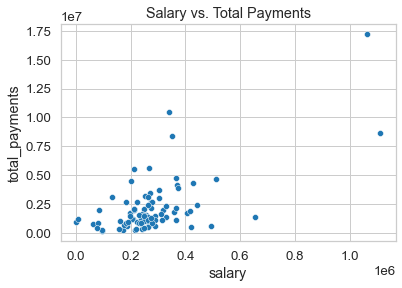

In [1756]:
sns.scatterplot(data=df_display, x='salary', y='total_payments').set(title='Salary vs. Total Payments')

There is a correlation between salaries and total stock values. A few outliers exist.

[Text(0.5, 1.0, 'Salary vs. Bonus')]

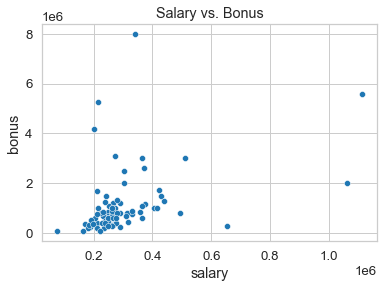

In [1757]:
sns.scatterplot(data=df_display, x='salary', y='bonus').set(title='Salary vs. Bonus')

There is a correlation between salaries and bonuses. A few outliers exist.

Text(0, 0.5, 'Salary')

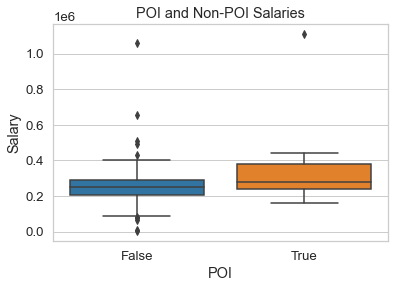

In [1758]:
sns.boxplot(x='poi',y='salary',data=df_display).set(title='POI and Non-POI Salaries')
plt.xlabel('POI')
plt.ylabel('Salary')

POIs have a greater salary than non-POIs.

Text(0, 0.5, 'Bonus')

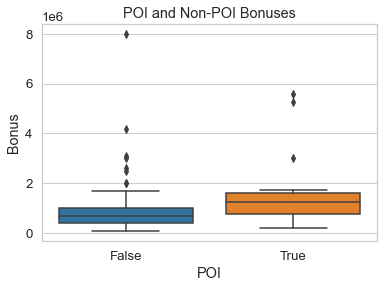

In [1759]:
sns.boxplot(x='poi',y='bonus',data=df_display).set(title='POI and Non-POI Bonuses')
plt.xlabel('POI')
plt.ylabel('Bonus')

POIs have a greater bonus value than non-POIs.
<br>
The next several plots explore incentives. A summary will be provided at the end.

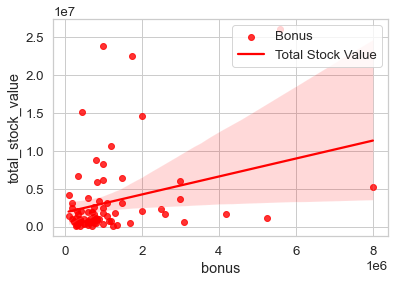

In [1760]:
sns.regplot(x=df_display['bonus'], y=df_display['total_stock_value'],color='r')
plt.legend(loc='upper right', labels=['Bonus', 'Total Stock Value'])

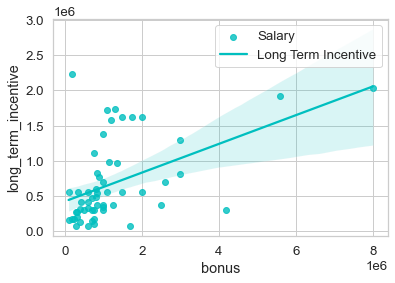

In [1761]:
sns.regplot(x=df_display['bonus'], y=df_display['long_term_incentive'],color='c')
plt.legend(loc='upper right', labels=['Salary', 'Long Term Incentive'])

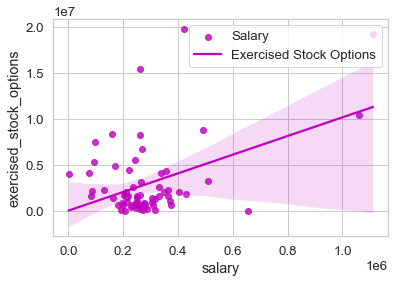

In [1762]:
sns.regplot(x=df_display['salary'], y=df_display['exercised_stock_options'], color='m')
plt.legend(loc='upper right', labels=['Salary', 'Exercised Stock Options'])

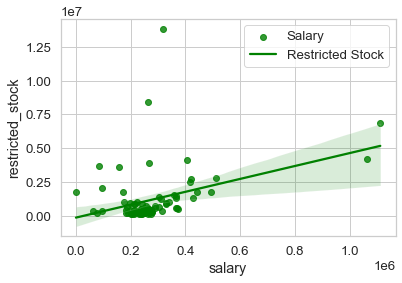

In [1763]:
sns.regplot(x=df_display['salary'], y=df_display['restricted_stock'],color='g')
plt.legend(loc='upper right', labels=['Salary', 'Restricted Stock'])

When comparing salary with stocks and long term incentives, we can see that the majority of salaries are within the normal range but it does seem as if the people with larger salaries and bonuses received more restricted stock and exercised their options more often.
<br>
Let's create a few features and compare them to determine the best features for the machine learning algorithms.

### Create new features
According to Lesson 12.2, POIs send emails to each other at a higher rate than the general population. The overall compensation is compelling as well. Let's create new features and take a look.

In [1764]:
# New features created for visualization dataframe
df_display['msg_from_poi'] = df_display.from_poi_to_this_person/df_display.to_messages
df_display['msg_to_poi'] = df_display.from_this_person_to_poi/df_display.from_messages
df_display['total_compensation'] = df_display.total_payments+df_display.total_stock_value
df_display[['msg_from_poi', 'msg_to_poi', 'total_compensation']].head()

,msg_from_poi,msg_to_poi,total_compensation
METTS MARK,0.047088,0.034483,1646889.0
BAXTER JOHN C,NaN,NaN,16257601.0
ELLIOTT STEVEN,NaN,NaN,6890460.0
CORDES WILLIAM R,0.013089,0.000000,NaN
HANNON KEVIN P,0.030622,0.656250,6679747.0


Text(0, 0.5, 'Messages from POI')

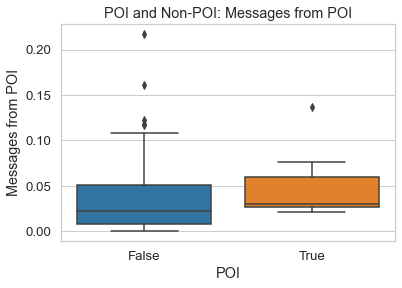

In [1765]:
sns.boxplot(x='poi',y='msg_from_poi',data=df_display).set(title='POI and Non-POI: Messages from POI')
plt.xlabel('POI')
plt.ylabel('Messages from POI')

Text(0, 0.5, 'Messages to POI')

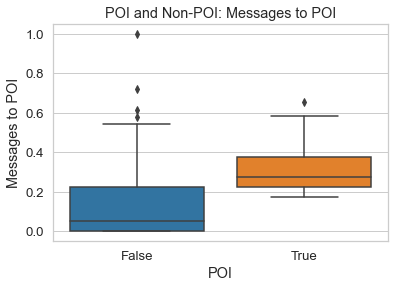

In [1766]:
sns.boxplot(x='poi',y='msg_to_poi',data=df_display).set(title='POI and Non-POI: Messages to POI')
plt.xlabel('POI')
plt.ylabel('Messages to POI')

The POIs were quite busy sending messages!

Text(0, 0.5, 'Total Compensation')

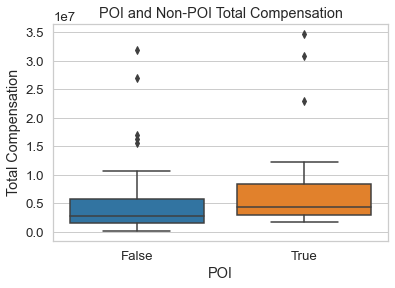

In [1767]:
sns.boxplot(x='poi',y='total_compensation',data=df_display).set(title='POI and Non-POI Total Compensation')
plt.xlabel('POI')
plt.ylabel('Total Compensation')

Creating a Total Compensation feature was a good idea. We can see that POIs have greater total compensation than non-POIs.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0.5, 0, 'to_messages'),
  Text(1.5, 0, 'deferral_payments'),
  Text(2.5, 0, 'total_payments'),
  Text(3.5, 0, 'loan_advances'),
  Text(4.5, 0, 'bonus'),
  Text(5.5, 0, 'restricted_stock_deferred'),
  Text(6.5, 0, 'deferred_income'),
  Text(7.5, 0, 'total_stock_value'),
  Text(8.5, 0, 'expenses'),
  Text(9.5, 0, 'from_poi_to_this_person'),
  Text(10.5, 0, 'exercised_stock_options'),
  Text(11.5, 0, 'from_messages'),
  Text(12.5, 0, 'from_this_person_to_poi'),
  Text(13.5, 0, 'poi'),
  Text(14.5, 0, 'long_term_incentive'),
  Text(15.5, 0, 'shared_receipt_with_poi'),
  Text(16.5, 0, 'restricted_stock'),
  Text(17.5, 0, 'msg_from_poi'),
  Text(18.5, 0, 'msg_to_poi'),
  Text(19.5, 0, 'total_compensation')])

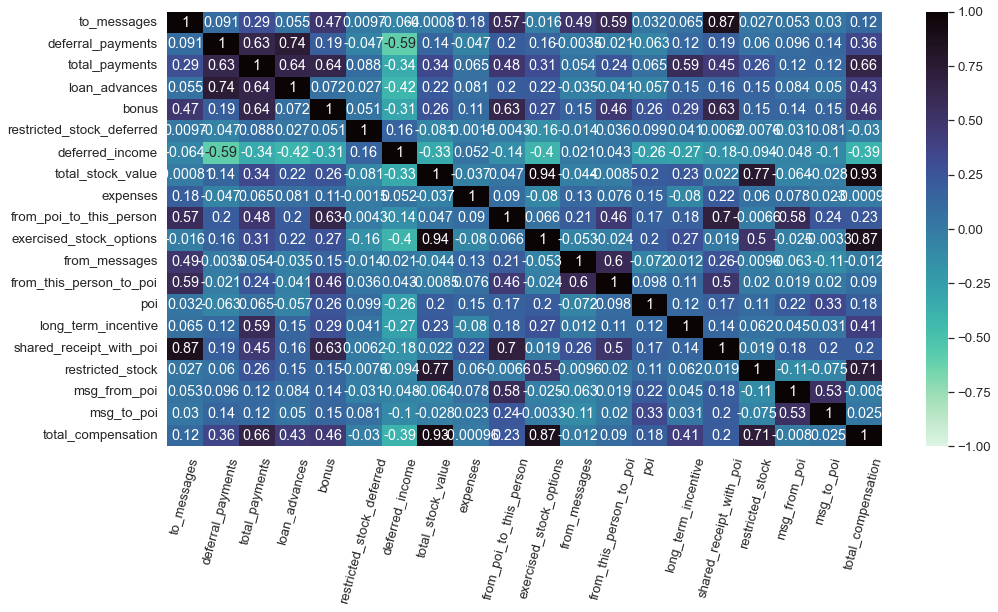

In [1768]:
data_heat = df_display.groupby(by="salary").sum()
plt.figure(figsize=(16,8))
sns.heatmap(data_heat.corr(), vmin = -1, vmax = +1, annot = True, cmap = "mako_r")
plt.xticks(rotation=75)

This correlation heatmap highlights the strongest and weakest relationships. The following strong relationships stand out:

<ul>
<li>exercised_stock_options  &  total_stock_value</li>
<li>total_compensation  &  total_stock_value</li>
<li>total_compensation  &  exercised_stock_options</li>
<li>total_compensation  &  restricted_stock</li>
<li>shared_receipt_with_poi  & to_messages</li>
<li>restricted_stock  &  total_stock_value</li>
<li>from_this_person_to_poi  &  shared_receipt_with_poi</li>
<li>bonus  &  total_payments</li>
<li>bonus  &  shared_receipt_with_poi</li>
</ul>

Let's compare by using SelectKBest to determine the best features using the most compelling original features. First, we will review the current list with new features added. Then, we will reshape the dataset to prepare it for the machine learning algorithms.

In [1769]:
# New features created for dataframe
my_dataset['msg_from_poi'] = my_dataset['from_poi_to_this_person'].astype('float')/my_dataset['to_messages'].astype('float')
my_dataset['msg_to_poi'] = my_dataset['from_this_person_to_poi'].astype('float')/my_dataset['from_messages'].astype('float')
my_dataset['total_compensation'] = my_dataset['total_payments'].astype('float')+my_dataset['total_stock_value'].astype('float')
my_dataset[['msg_from_poi', 'msg_to_poi', 'total_compensation']].head()
# print the updated features
my_feature_set = [x for x in my_dataset.columns]
print('Total Features with New: ', {len(my_feature_set)})
print(my_feature_set)

Total Features with New:  {23}
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'from_this_person_to_poi', 'poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'msg_from_poi', 'msg_to_poi', 'total_compensation']


.Earlier, we discovered a large number of NaN values for deferral_payments, loan_advances, and restricted_stock_preferred.

Now that we have thoroughly explored the data, let's drop them.

In [1770]:
# my_dataset = pd.DataFrame.from_dict(data_dict, orient='index')
my_dataset.drop('email_address', axis=1, inplace=True)
my_dataset.drop('loan_advances', axis=1, inplace=True)
my_dataset.drop('deferral_payments', axis=1, inplace=True)
my_dataset.drop('restricted_stock_deferred', axis=1, inplace=True)
my_dataset.drop('director_fees', axis=1, inplace=True)
my_feature_list = [x for x in my_dataset.columns]
my_feature_list.insert(0, my_feature_list.pop(my_feature_list.index('poi')))
print('Total Remaining Features: ', {len(my_feature_list)})
print(my_feature_list)

Total Remaining Features:  {18}
['poi', 'salary', 'to_messages', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'msg_from_poi', 'msg_to_poi', 'total_compensation']


In [1771]:
# Adding new features to my_dataset for use in my_dataset
my_dataset['msg_to_poi'] = my_dataset['msg_to_poi'].astype(object)
my_dataset['msg_from_poi'] = my_dataset['msg_from_poi'].astype(object)
my_dataset['total_compensation'] = my_dataset['total_compensation'].astype(object)
# my_dataset.dtypes

In [1772]:
# Replacing the NaN values so they work properly with feature_format
my_dataset[['msg_to_poi','msg_from_poi','total_compensation']] = my_dataset[['msg_to_poi','msg_from_poi','total_compensation']].fillna('NaN')

In [1773]:
# Converting the current pandas dataset to a new dictionary so I do not further modify data_dict
my_dict = my_dataset.T.to_dict()
dict(list(my_dict.items())[0:2])

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'total_payments': 1061827,
  'bonus': 600000,
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'msg_from_poi': 0.04708798017348203,
  'msg_to_poi': 0.034482758620689655,
  'total_compensation': 1646889.0},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'total_payments': 5634343,
  'bonus': 1200000,
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_messages': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'poi': False,
  'long_term_incentive': 1586055,
  'shared_receipt_with_poi': 'NaN',
  'restricted_stock': 3942714,
  'msg_from_poi': '

In [1774]:
### Extract features and labels from dataset for local testing
data = feature_format(my_dict, my_feature_list, sort_keys=True)
labels, features = target_feature_split(data)
np.array(features).reshape(-1, 1)
from sklearn.feature_selection import SelectKBest, f_classif

feature_select = SelectKBest(f_classif, k=10)
feature_select.fit(features, labels)
transformed = feature_select.transform(features)
feature_scores = zip(my_feature_list[1:], feature_select.scores_)
print('Dataset after selecting best features:')
print(transformed.shape)

def function(transformed):
    return transformed[1]

feature_scores = sorted(feature_scores, key=function, reverse=True)
x = 0
while x < 10:
    print(feature_scores[x])
    x = x + 1

Dataset after selecting best features:
(142, 10)
('exercised_stock_options', 16.589349111839056)
('total_stock_value', 16.094970097577196)
('total_compensation', 15.98496617850198)
('msg_to_poi', 13.877403344052373)
('bonus', 13.755416536944795)
('salary', 12.15817420832572)
('deferred_income', 11.71153866112108)
('shared_receipt_with_poi', 6.951883644005653)
('long_term_incentive', 5.136849876988109)
('expenses', 4.85044542134973)


Looking great! Using SelectKBest was a good idea. This output aligns with what we observed in the correlation matrix.

SelectKBest uses the ANOVA F-value to measure the variance (degrees of freedom) between features. A higher value shows more variations between POIs and non-POIs. The top 10 are the best features from this test.

I set a K of 10 and limited my final output to the top 10 best feature scores. We will use this output in the classifiers.

<a id='Task4'></a>
## Task 4: Try a Variety of Classifiers
Alright! Let's get classy!

In [1775]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

Naive Bayesian Classifier



In [1776]:
nb_clf = GaussianNB()
data = feature_format(my_dict, my_feature_list)
labels, features = target_feature_split(data)
np.array(features).reshape(-1, 1)

nb_clf.fit(features_train, labels_train)
nb_predict = nb_clf.predict(features_test)
nb_accuracyScore = accuracy_score(nb_predict, labels_test)

print("Accuracy: ", nb_accuracyScore)
print("Precision: ", precision_score(nb_predict, labels_test))
print("Recall: ", (recall_score(nb_predict, labels_test)))

Accuracy:  0.8837209302325582
Precision:  0.42857142857142855
Recall:  0.75


Decision Tree Classifier

In [1777]:
dt_clf = DecisionTreeClassifier()
data = feature_format(my_dict, my_feature_list)
np.array(features).reshape(-1, 1)
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.3,random_state=42)

dt_clf.fit(features_train, labels_train)
dt_predict = dt_clf.predict(features_test)
dt_accuracyScore = accuracy_score(dt_predict, labels_test)

print("Accuracy: ", dt_accuracyScore)
print("Precision: ", precision_score(dt_predict, labels_test))
print("Recall: ", (recall_score(dt_predict, labels_test)))

Accuracy:  0.6976744186046512
Precision:  0.4
Recall:  0.16666666666666666


### Definitions
Before we begin, let's review some definitions for classification model parameters. Classification algorithms use the following parameters to calculate scores:

Parameters
True Positives (TP): Actual Value = Predicted Value
ex. A person is identified as a POI and they also have a high total compensation

True Negatives (TN): Actual Value != Predicted Value
ex. A person is not identified as a POI and they do not have a high total compensation

False Positives (FP): Actual Value = No & Predicted Value = Yes
ex. A person is not identified as a POI but they have a high total compensation

False Negatives (FN): Actual Value = Yes & Predicted Value = No
ex. A person is identified as a POI but they have a low total compensation

Scores
Accuracy: The ratio of correctly predicted observations to total observations
ex. What is the number features that we labeled in each category divided by the total number of features?

Precision: The ratio of correctly predicted positive observations to total predicted positive observations.
ex. Of the POIs, how many had high salaries?

Recall - The ratio of correctly predicted positive observations to all observations
ex. For all of the people in the dataset, how many were labeled POI?

### Importance of Validation and Metrics
Validation is vital to machine learning algorithm development. It allows us to observe the make sure that our model is working correctly. In addition, validation gives us an opportunity to tune the model or change models if the metrics do not meet expectations.

In the models selected above, the accuracy and recall are better for Naive Bayes but the precision is better for DecisionTree. Further tuning could improve these measures but I am pleased with the outcome for Naive Bayes.

### Selected Algorithm
Naive Bayes is a simple supervised learning classification algorithm. It uses a Bayesian Search which finds the best hyperparameter values for a required dataset using Gaussian Process and Bayes rule. In other words, the model trains quickly but it can be slow. Naive Bayes performs better with a smaller number of observations so it is ideal for the Enron dataset. If the Enron dataset were larger, I would start with a Decision Tree and Grid Search instead of Naive Bayes.

The accuracy of Naive Bayes is typically trustworthy, especially if the features are preprocessed in some manner. We thoroughly examined the data, eliminated obvious outliers, dropped unnecessary columns, and used SelectKBest to analyze the rest. I think Naive Bayes was our best choice.

NB vs. DT

Accuracy:  0.88 | 0.72

Precision: 0.43  | 0.6

Recall:    0.75  | 0.23

### Training the Algorithm
Before training either algorithm, we used scikit-learn's test_train_split function. test_train_split is a cross validation function that splits arrays into random train and test subsets. We cannot train an algorithm with the same data that was used to create it. That would give us a perfect score.

This is an example of a classic validation mistake, overfitting. We used cross validation to avoid overfitting. 88% for Naive Bayes is a realistic accuracy calculation for this dataset.

<a id='Task5'></a>
## Task 5: Tune a Classifier

#### Naive Bayes (GaussianNB) Feature Scaling
Technically there are no parameters to "tune" for GaussianNB. We optimized this algorithm by using SelectKBest to identify the best features. While typically manual tuning is not ideal for larger datasets, the size of this dataset is small. The Exploratory Data Analysis and SelectKBest provided us with ample information to tune GaussianNB manually.
<br>
#### DecisionTree Feature Scaling
We are not selecting DecisionTree for our final algorithm, but there are multiple DecisionTree parameters that can be tuned. Presorting is a good example. There are pros and cons to the presorting approach. Presorting may improve the algorithm's best fit finding capabilities but the training time will increase. It may be better to use presorting for smaller datasets and avoid it for larger datasets.

The sklearn Decision Tree site provides a ton of great information. It is also an excellent reminder that all data analysts should strive to attain a foundational understanding of Data Structures & Algorithms. 
https://scikit-learn.org/stable/modules/tree.html#complexity

<a id='Task6'></a>
## Task 6: Dump Changes and Validate
Cleanup for .pkl file generation and validation is handled in by poi_id.py

<a id='conclusions'></a>
## Conclusions
We were able to use an Exploratory Data Analysis (EDA) to analyze, clean, visualize, and prepare our data for the algorithm. Simple box plots and scatter plots showed us an interesting story for the machine learning algorithms to validate. The EDA also also highlighted the outliers and null values that needed attention. SelectKBest validated our observations programmatically.

The accuracy score of 88% for Naive Bayes classification is good for such a small dataset. The algorithm is reliable and runs efficiently. Accuracy was also somewhat high for our DecisionTree algorithm but not as good as Naive Bayes. Precision was less than optimal for both. As I mentioned earlier in the analysis, the precision would increase if we get more data.

<a id='sources'></a>
## Sources
<ul>
<li>https://docs.python.org</li>
<li>https://www.geeksforgeeks.org</li>
<li>https://www.statology.org</li>
<li>https://datatofish.com</li>
<li>https://scikit-learn.org</li>
<li>https://seaborn.pydata.org/generated/seaborn.heatmap.html</li>
<li>https://stackoverflow.com/questions/61700541/getting-the-column-names-chosen-after-a-feature-selection-method</li>
<li>https://www.dataschool.io/comparing-supervised-learning-algorithms/</li>
<li>http://busigence.com/blog/hyperparameter-optimization-and-why-is-it-important</li>
<li>https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/</li>
</ul>
